### Stock Market Prediction And Forecasting Using  LSTM Jupyter notebook 

## Stock Prediction :
Take stock price of any company you
want and predicts its price by using LSTM.
Use only Jupyter notebook code.

In [1]:
# -*- coding: utf-8 -*-
"""

@author: DIPANKAR SANTRA
"""

'\n\n@author: DIPANKAR SANTRA\n'

In [2]:
# =============================================================================
# Importing the libraries
# =============================================================================
import numpy as np # Data Handling
import matplotlib.pyplot as plt # Data Visualization
import pandas as pd # # Data Handling
import os # Working Directory
from sklearn.preprocessing import LabelEncoder, OneHotEncoder # Transformation of Categorical columns into Numerical Values
from sklearn.compose import ColumnTransformer # Transformation same as level encoding and one hotencoding
from sklearn.model_selection import train_test_split # Splitting Data into Train & Test
from sklearn.preprocessing import StandardScaler # Neural Networks --> generally standarize the data
from sklearn.metrics import confusion_matrix # Model Evaluation 
from sklearn.metrics import classification_report # Model Evaluation 
import keras # Deep Learning Framework 
from keras.models import Sequential # Adding layers in the Neural Network 
from keras.layers import Dense # Adding layers in the Neural Network 

In [3]:
# =============================================================================
# Importing the dataset
# =============================================================================
df = pd.read_csv('./data/TCS.csv')


In [4]:
# =============================================================================
# EDA of the Data
# =============================================================================
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,25-08-2004,TCS,EQ,850.00,1198.7,1198.7,979.00,985.00,987.95,1008.32,17116372,1.725880e+15,NaN,5206360,0.3042
1,26-08-2004,TCS,EQ,987.95,992.0,997.0,975.30,976.85,979.00,985.65,5055400,4.982860e+14,NaN,1294899,0.2561
2,27-08-2004,TCS,EQ,979.00,982.4,982.4,958.55,961.20,962.65,969.94,3830750,3.715590e+14,NaN,976527,0.2549
3,30-08-2004,TCS,EQ,962.65,969.9,990.0,965.00,986.40,986.75,982.65,3058151,3.005110e+14,NaN,701664,0.2294
4,31-08-2004,TCS,EQ,986.75,986.5,990.0,976.00,987.80,988.10,982.18,2649332,2.602130e+14,NaN,695234,0.2624


In [26]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
4134,26-04-2021,TCS,EQ,3109.50,3102.05,3153.00,3088.05,3100.05,3100.80,3122.35,2490260,7.775460e+14,87012.0,1345353,0.5402
4135,27-04-2021,TCS,EQ,3100.80,3106.00,3136.10,3103.00,3132.75,3132.00,3122.18,1471417,4.594040e+14,97077.0,849767,0.5775
4136,28-04-2021,TCS,EQ,3132.00,3149.95,3151.00,3112.00,3123.00,3124.10,3125.72,1639037,5.123180e+14,76017.0,847762,0.5172
4137,29-04-2021,TCS,EQ,3124.10,3145.60,3157.35,3105.50,3114.45,3115.25,3130.83,1621395,5.076310e+14,98275.0,837567,0.5166
4138,30-04-2021,TCS,EQ,3115.25,3099.00,3132.05,3020.00,3040.00,3035.65,3063.19,3072305,9.411060e+14,157829.0,1942473,0.6323


In [5]:
#Shape 
df.shape

(4139, 15)

In [6]:
#Inforrmation about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4139 entries, 0 to 4138
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                4139 non-null   object 
 1   Symbol              4139 non-null   object 
 2   Series              4139 non-null   object 
 3   Prev Close          4139 non-null   float64
 4   Open                4139 non-null   float64
 5   High                4139 non-null   float64
 6   Low                 4139 non-null   float64
 7   Last                4139 non-null   float64
 8   Close               4139 non-null   float64
 9   VWAP                4139 non-null   float64
 10  Volume              4139 non-null   int64  
 11  Turnover            4139 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4139 non-null   int64  
 14  %Deliverble         4139 non-null   float64
dtypes: float64(10), int64(2), object(3)
memory usage: 485.2

In [7]:
#Checking missing values across features
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                1683
Deliverable Volume       0
%Deliverble              0
dtype: int64

In [ ]:
# =============================================================================
# Data Processing
# =============================================================================

In [8]:
df1 = df.reset_index()['Close']

In [9]:
df1

0        987.95
1        979.00
2        962.65
3        986.75
4        988.10
         ...   
4134    3100.80
4135    3132.00
4136    3124.10
4137    3115.25
4138    3035.65
Name: Close, Length: 4139, dtype: float64

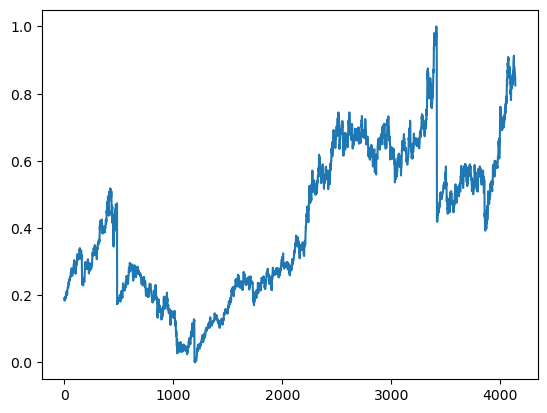

In [57]:
plt.plot(df1)

In [11]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 

In [58]:
df1

array([[0.19193401],
       [0.18916915],
       [0.18411826],
       ...,
       [0.85184041],
       [0.84910644],
       [0.82451615]])

In [59]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [15]:
print(df1)

[[0.19193401]
 [0.18916915]
 [0.18411826]
 ...
 [0.85184041]
 [0.84910644]
 [0.82451615]]


In [16]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [17]:
training_size,test_size

(2690, 1449)

In [18]:
train_data

array([[0.19193401],
       [0.18916915],
       [0.18411826],
       ...,
       [0.66832455],
       [0.67434856],
       [0.68730789]])

In [60]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [61]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [62]:
print(X_train.shape), print(y_train.shape)

(2589, 100)
(2589,)


(None, None)

In [63]:
print(X_test.shape), print(ytest.shape)

(1348, 100)
(1348,)


(None, None)

In [64]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [65]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [66]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [67]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [68]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 100, 50)           10400     
                                                                 
 lstm_4 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_5 (LSTM)               (None, 50)                20200     
                                                                 
 dense_1 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=20,batch_size=64,verbose=1)

Epoch 1/20
41/41 [==============================] - 24s 393ms/step - loss: 0.0115 - val_loss: 0.0035
Epoch 2/20
41/41 [==============================] - 14s 334ms/step - loss: 8.3472e-04 - val_loss: 0.0029
Epoch 3/20
41/41 [==============================] - 13s 326ms/step - loss: 7.1438e-04 - val_loss: 0.0028
Epoch 4/20
41/41 [==============================] - 13s 325ms/step - loss: 7.5595e-04 - val_loss: 0.0026
Epoch 5/20
41/41 [==============================] - 13s 326ms/step - loss: 6.5744e-04 - val_loss: 0.0028
Epoch 6/20
41/41 [==============================] - 13s 323ms/step - loss: 6.8359e-04 - val_loss: 0.0027
Epoch 7/20
41/41 [==============================] - 13s 309ms/step - loss: 6.2379e-04 - val_loss: 0.0023
Epoch 8/20
41/41 [==============================] - 12s 302ms/step - loss: 6.8941e-04 - val_loss: 0.0022
Epoch 9/20
41/41 [==============================] - 13s 323ms/step - loss: 5.7873e-04 - val_loss: 0.0020
Epoch 10/20
41/41 [==============================] - 13s 33

In [32]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

43/43 [==============================] - 2s 44ms/step


In [33]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [34]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

1410.8606076914498

In [35]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

2346.112414844705

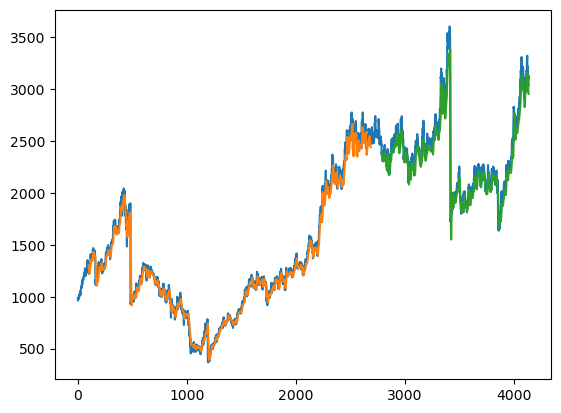

In [ ]:
### Plotting 
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [ ]:
len(test_data)

1449

In [ ]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape


(1, 1108)

In [ ]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [ ]:
temp_input

[0.5570504008279142,
 0.5526019060564402,
 0.5358273736890071,
 0.5420521771365905,
 0.5631516349762902,
 0.5469640567800931,
 0.5432260854790627,
 0.5456356868136112,
 0.5462844256344512,
 0.5528799369796573,
 0.5627963732410683,
 0.5973648846943977,
 0.5918814970420598,
 0.584853493149627,
 0.5898580497675354,
 0.5859656168424954,
 0.5731144097249039,
 0.5620395112834218,
 0.5609119414281523,
 0.5523238751332233,
 0.5650515129516072,
 0.5648970513275977,
 0.5688976073894441,
 0.5664571137300938,
 0.5687122534406326,
 0.5846835853632166,
 0.591896943204461,
 0.59382771350458,
 0.609397445204739,
 0.6014581177306499,
 0.5996354705673375,
 0.5935805749061647,
 0.5951251911462598,
 0.6044855655612364,
 0.6013963330810461,
 0.6132280934801748,
 0.6175066804652385,
 0.6162092028235584,
 0.6183407732348898,
 0.621816159775104,
 0.6078837212894457,
 0.5915107891444371,
 0.5983997775752614,
 0.6019987334146832,
 0.6047944888092553,
 0.6109575076072351,
 0.5815943528830263,
 0.5844518929272022

In [69]:
day_new=np.arange(1,101)
day_pred=np.arange(101,131)

In [70]:
import matplotlib.pyplot as plt

In [71]:
len(df1)

4139

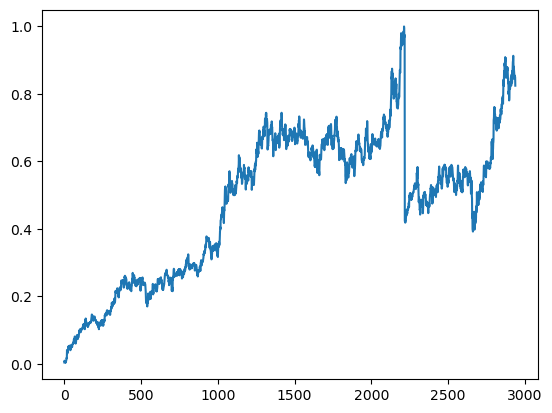

In [72]:
df3=df1.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [73]:
df3=scaler.inverse_transform(df3).tolist()

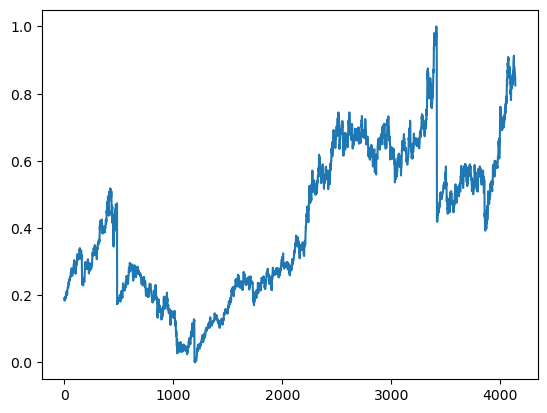

In [74]:
plt.plot(df3)